# Red Wine Quality prediction project

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#importing dataset from a given github link using raw option. 

In [3]:
dataframe=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Exploratory Data Analysis (EDA)

In [5]:
#Checking the dimention of the datasets
dataframe.shape

(1599, 12)

There are total 1599 rows and 12 columns present in our dataset. 

In [6]:
#checking the null values
dataframe.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no null values present in the dataset. All the feature columns as float datatype that is similar datatypes.

In [8]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Using the describe method to see the count, mean, standard deviation, minimum, maximum, and inter quantile values of our dataset.

As per the observation:
    
    1. There is a big gap between 75% and max value of residual sugar
    2. There is a big gap between 75% and max value of free sulfur dioxide
    3. There is a big gap between 75% and max value of total sulfur dioxide
    
All these gaps indicates that there are outliners present in our dataset which needs to be treated to get a better model accuracy.

In [9]:
dataframe.skew()
#acceptable range is +/-0.5

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Here we see the skewness information present in our datasets. We will ignore quality since it is our target label in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugat, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol are all outside the acceptable range of +/10.5. This skewness indicates outliers being present that will need to be treated if required. 

# Visualization

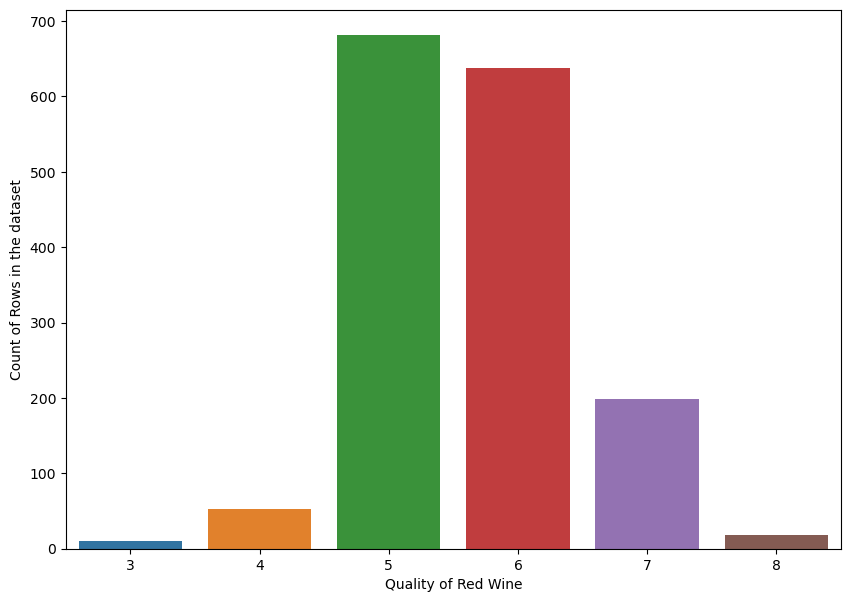

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'quality', data = dataframe)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

In the countplot representation we see the various categories of red wine quality and it shows that the nuber of data present for quality score 5 and 6 is way higher than it's counterparts. This indicates an imbalance which need to be rectifie soo that our machine learning model do not get biased to a certain value during prediction.

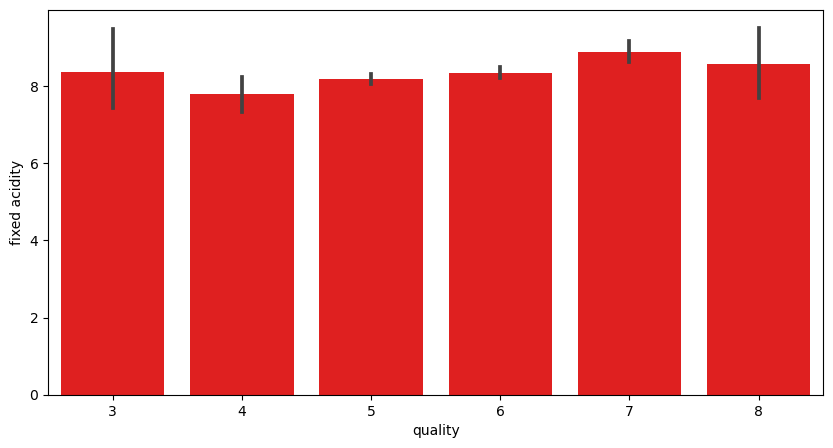

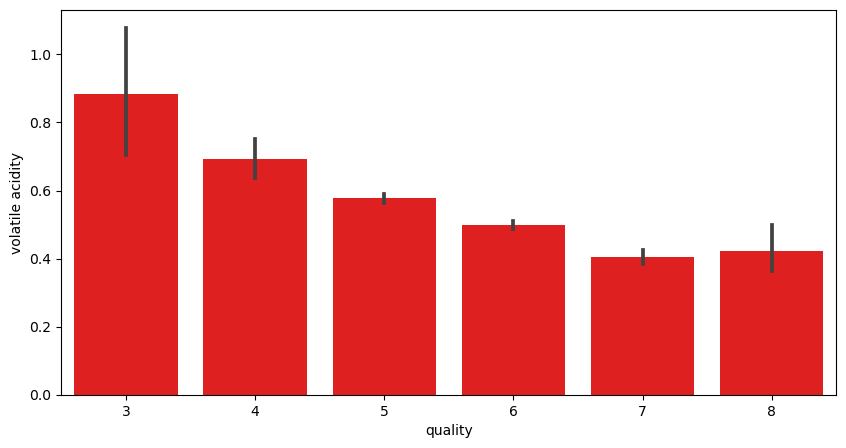

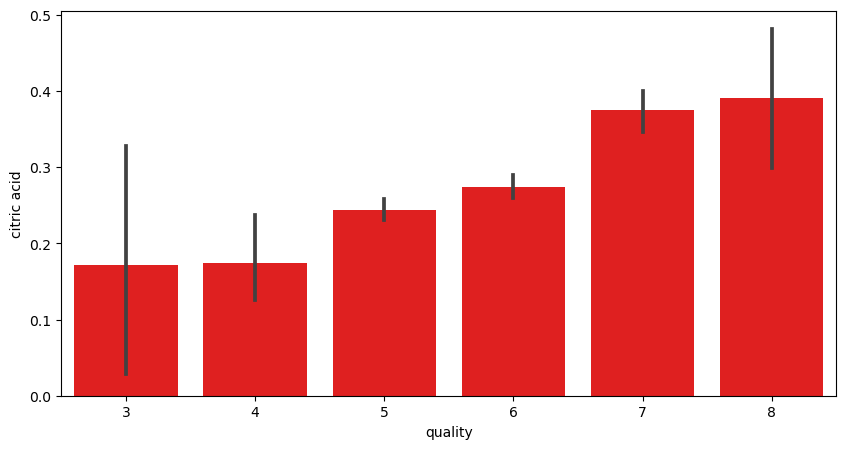

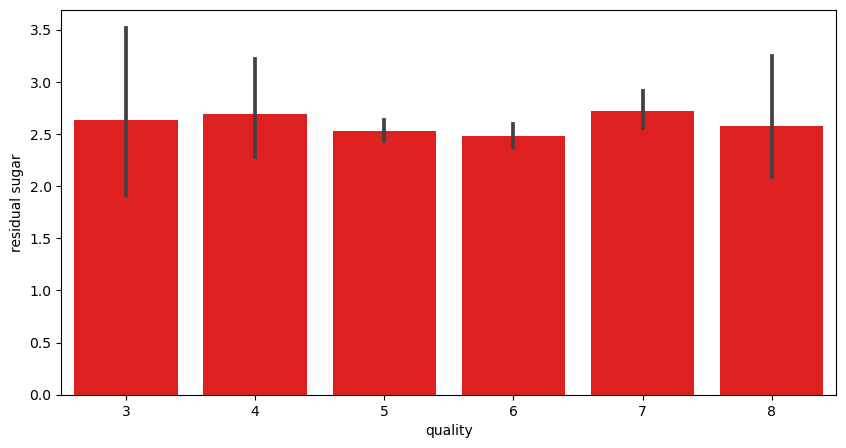

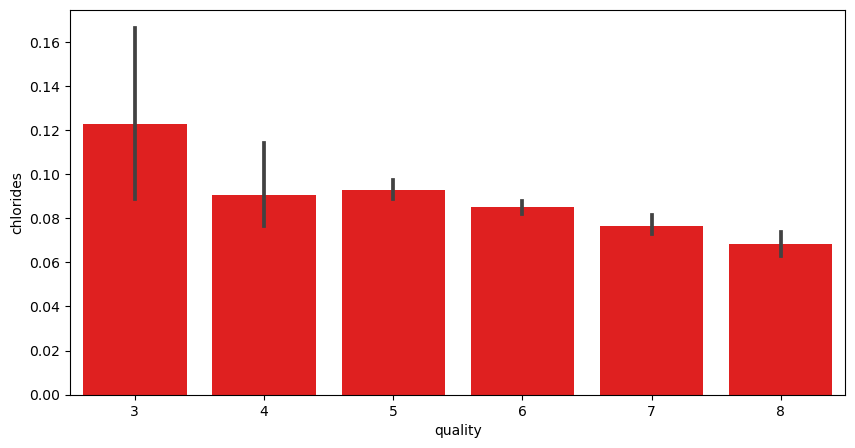

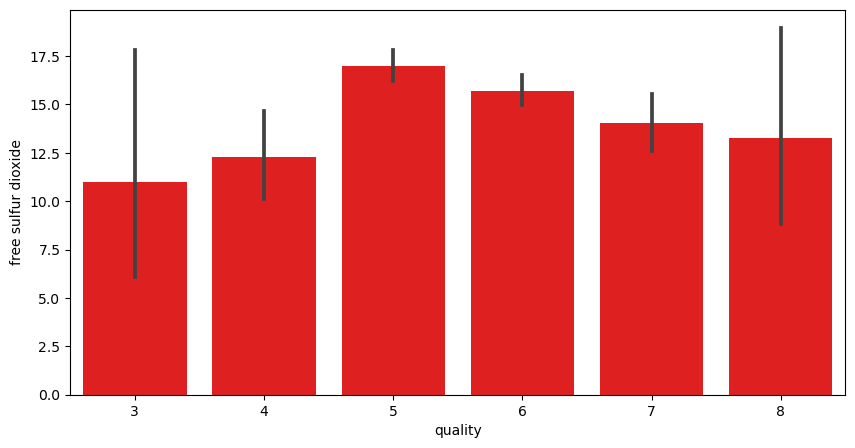

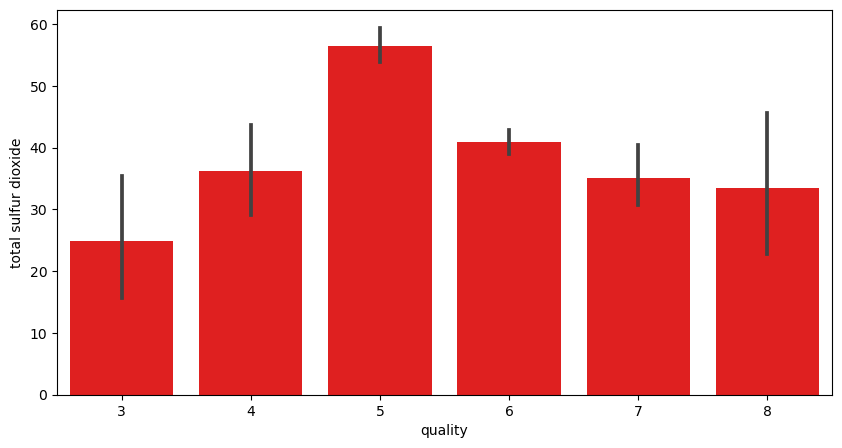

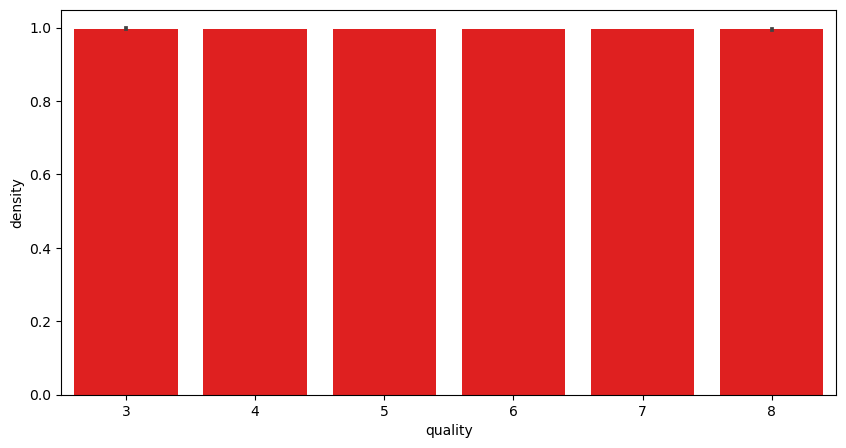

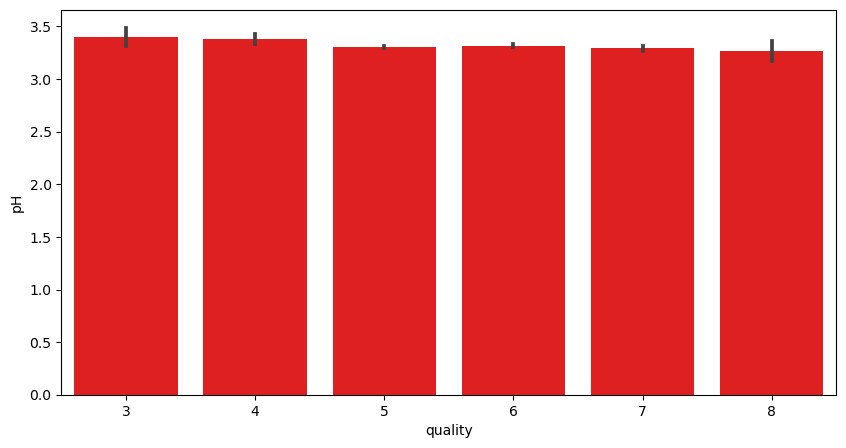

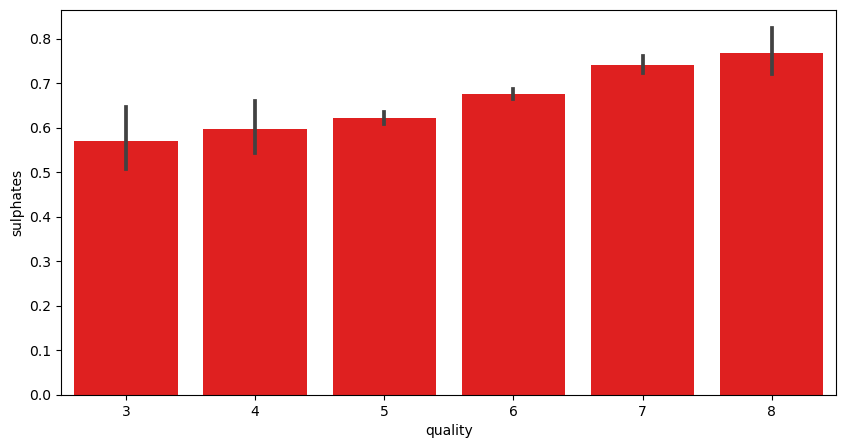

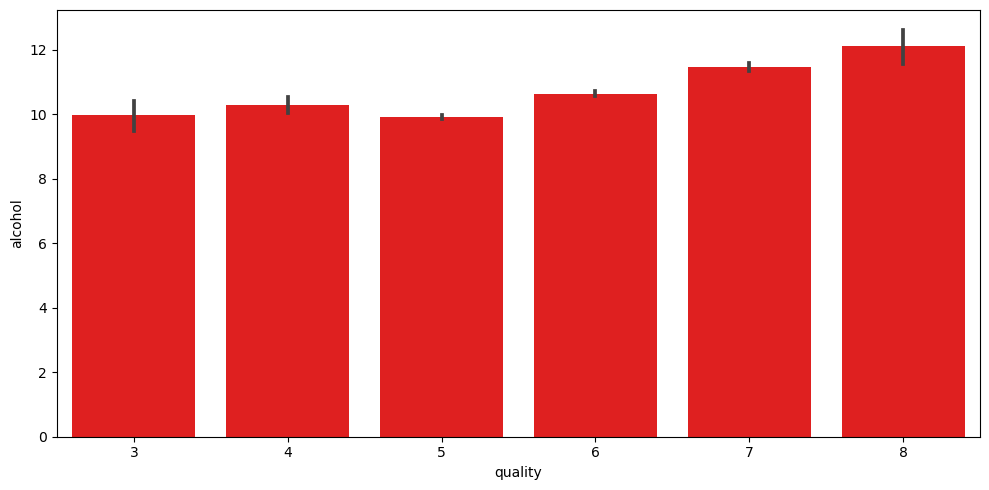

In [11]:
index=0
labels = dataframe['quality']
features = dataframe.drop('quality',axis=1)

for column in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=column[index], data=dataframe, color="red")
plt.tight_layout()
plt.show()


With the features vs label barplot we are able to see the trend corresponding to the impact each has with resppect to predicting the quality column(our target variable).

Observation regarding feature compared to the label are:

    1. fixed acidity v/s quaity - no fixed pattern
    2. volatile acidity vs quality - there is a deccreasing trend 
    3. citricacid vs quality  - there is an increasing trend 
    4. redidual sugar vs quality - no fixed pattern
    5. chlorides vs quality - there is a decreasing trend 
    6. free sufur dioxide vs quality  - no fixed pattern as it is increasing then decreasing
    7. total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 
    8. density vs quality - no pattern at all 
    9. pH vs quality - no pattern at all 
    10.sulphates vs quality - there is an increasing trend 
    11.alcohol vs quality - there is an increasing trend 
    
so here we can conclude that to get better quality wine citric aciide, sulphates and alcohol columns play a major role.
    

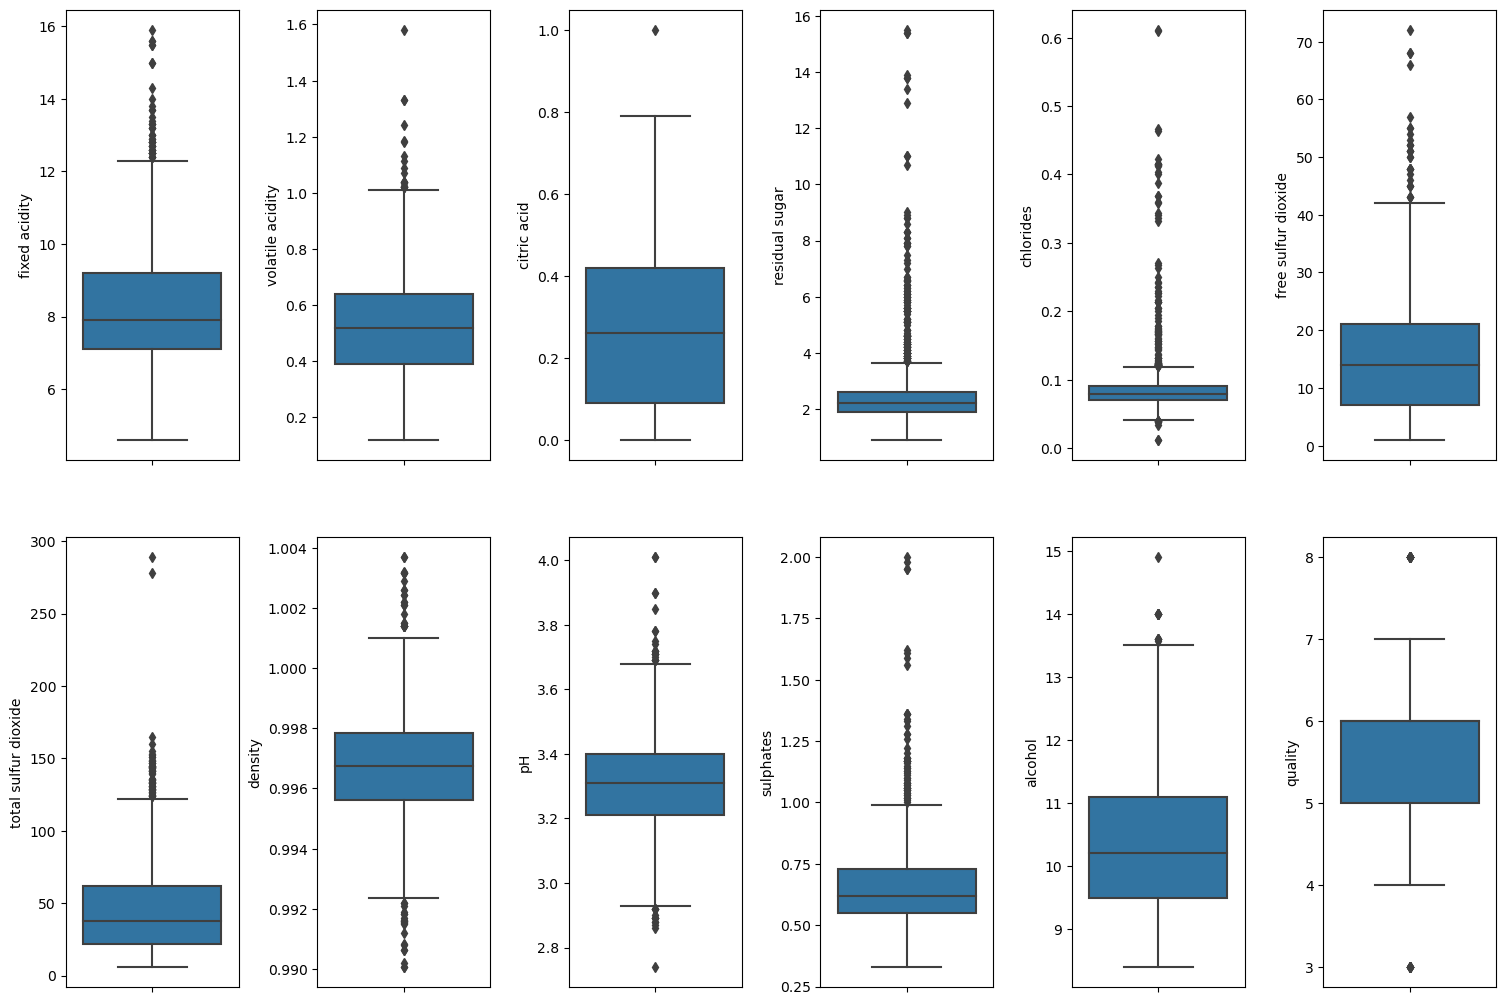

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0 
ax = ax.flatten()
for col, value in dataframe.items():
    sns.boxplot(y=col, data=dataframe, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

with the help of the above boxplot we are able to see the whisker details and outliers clearly. i am ignoring the continous outlier sections but the outliers that are single values and fas away from the whiskers of the boxplot may need to be treared depending upon further analysis. Right now i am just trying to retain as much of data which is possible in the given dataset.

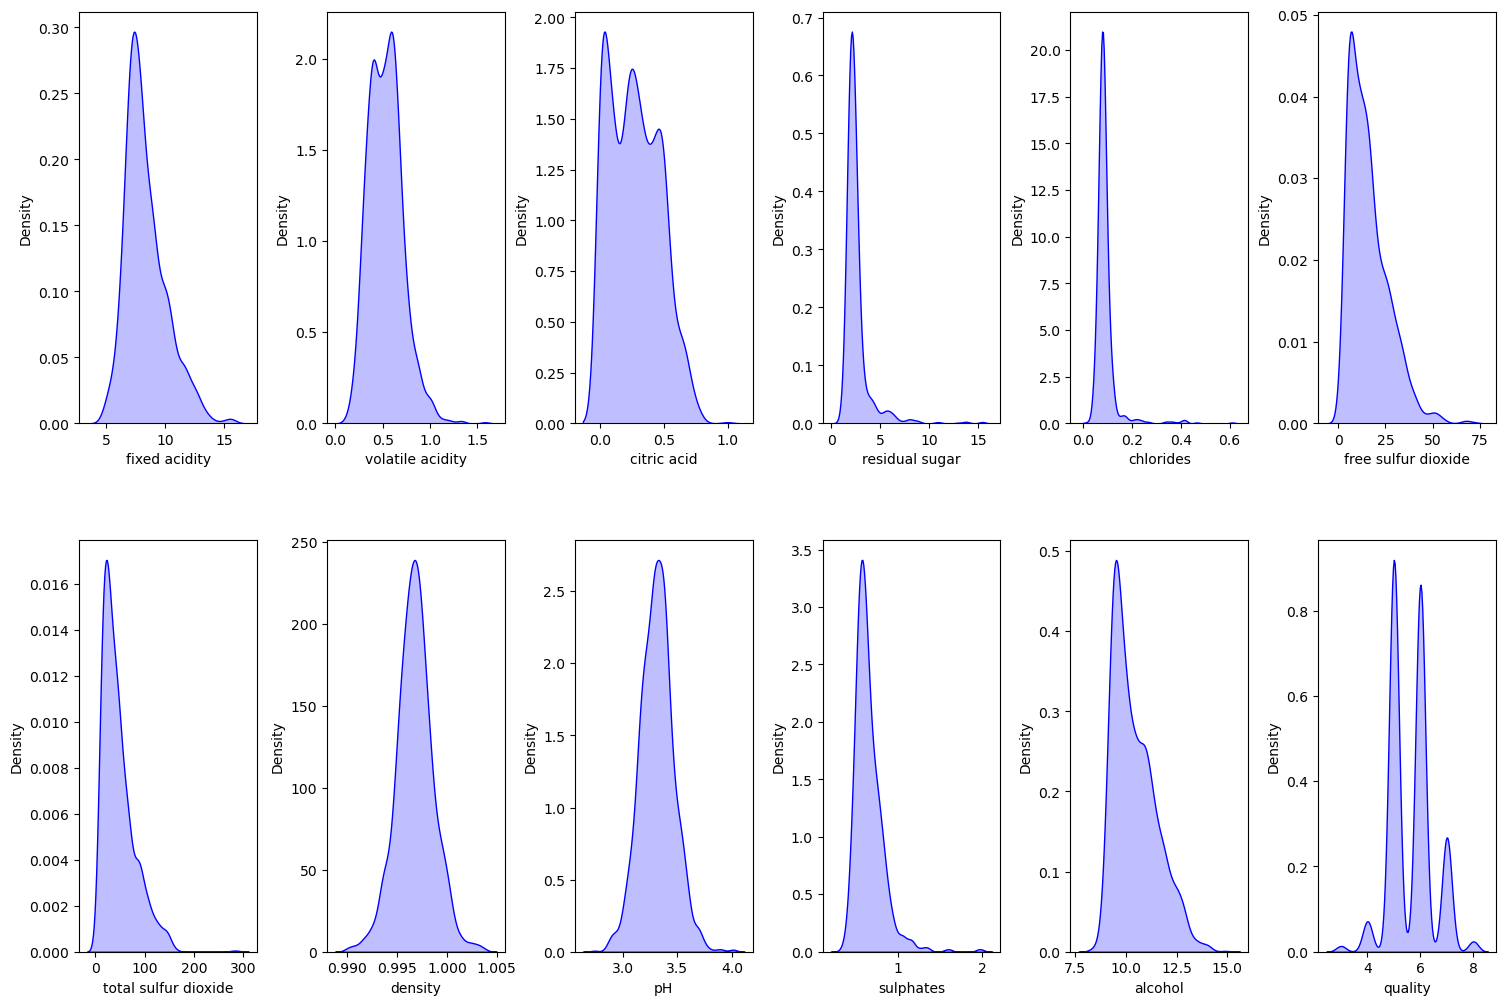

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=2,figsize=(15,10))
index = 0 
ax = ax.flatten()
for col, value in dataframe.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade":True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

# Correlation using a heatmap

1. positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variable move in the same direction together
2. Negative correlation - A correlation of -1 indicates a perfect negative correlation, meanring that as one variable goes up the other goes down

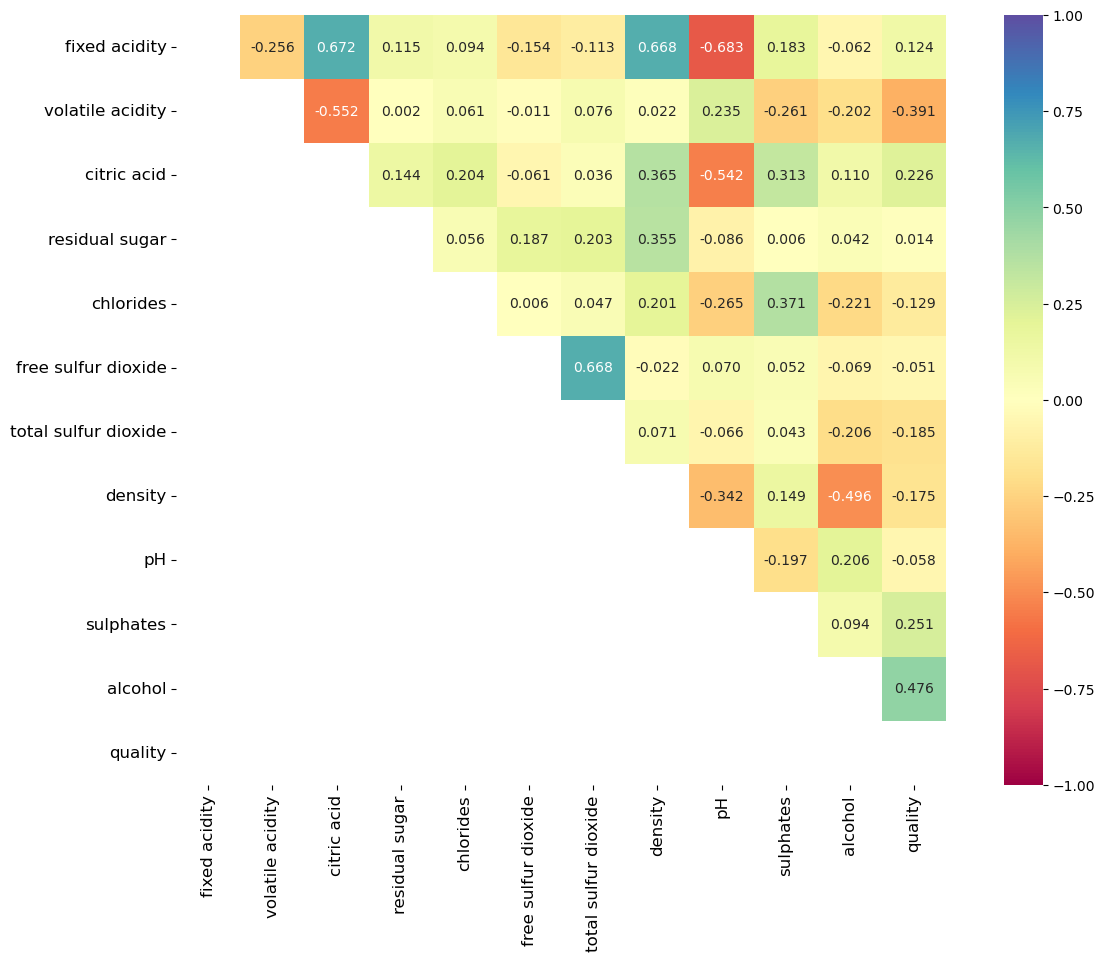

In [14]:
lower_triangle = np.tril(dataframe.corr())
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Dropping a column

In [15]:
dataframe = dataframe.drop('free sulfur dioxide', axis=1)
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


i feel that free sulfur dioxidde and total sulfur dioxide are both indicating towards  the same feature of sulfur dioxide therefore im dropping the free option and keeping just the total option in our datasets.

# outlier removel 

In [16]:
dataframe.shape

(1599, 11)

In [17]:
import scipy.stats as stats 
from scipy.stats import zscore

In [18]:
#Z score method 

z=np.abs(zscore(dataframe))
threshold=3
np.where(z>3)

dataframe=dataframe[(z<3).all(axis=1)]
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


i have used the Z score method to get ride of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [19]:
dataframe.shape

(1464, 11)

Checking the number of rows present in the dataset after applying the outlier removal technique.

In [20]:
#persentage of data loss

data_loss=(1599-1464)/1599*100
data_loss

8.442776735459661

After removing the outliers we are checking the data loss persentage by comparing thr rows in our original dataset and new dataset post removal of the outlier

# splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [21]:
X = dataframe.drop('quality', axis=1)
Y = dataframe['quality']

i have bifurcated the dataset into features and labels where X represents  all the feature columns and Y represents the target label colum.

Taking care of Class imbalance

In [22]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

Listing the values of our label column to count the number of rows accupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
#adding samples to make all the catergorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to enusre that all the categories present in our target label have the same value.

In [25]:
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have sucessfully resolved the class imbalance problem and now all the categories have same data enuring that the machine learning model does not get biased towards one catergory.

In [26]:
Y # Displaying just the label

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

# Label Binarization

In [27]:
Y = Y.apply(lambda Y_value:1 if Y_value>=7 else 0)  # 1 is for good quality and 0 for bad quality 
Y 

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

Using the label binarization technique we have tagged the categories present in oour target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

In [28]:
X 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,10.598777,0.353374,0.523252,2.561439,0.069904,15.807194,0.997102,3.159640,0.651928,11.033741
3116,7.338987,0.374043,0.321417,1.995036,0.057340,31.233719,0.994710,3.217590,0.753547,11.324819
3117,11.100685,0.586431,0.658461,4.948233,0.085371,18.790194,0.998548,3.212657,0.714128,13.221665
3118,9.826898,0.351540,0.469713,4.586442,0.072211,14.182755,0.996425,3.222115,0.768747,12.560575


In [29]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling

In [30]:
# applying scaling technique to avoid bias output
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.657326,1.053915,-1.508329,-0.644117,-0.139291,-0.095318,0.857552,1.462025,-0.793680,-1.259109
1,-0.404774,2.060406,-1.508329,0.146408,1.096889,1.156133,0.240889,-0.752344,0.097594,-0.898128
2,-0.404774,1.389412,-1.302551,-0.192388,0.759749,0.663137,0.364222,-0.323756,-0.125224,-0.898128
3,1.741916,-1.294562,1.372566,-0.644117,-0.195481,0.890674,0.980884,-1.038069,-0.645134,-0.898128
4,-0.657326,1.053915,-1.508329,-0.644117,-0.139291,-0.095318,0.857552,1.462025,-0.793680,-1.259109
...,...,...,...,...,...,...,...,...,...,...
3115,1.362316,-0.884282,1.183517,0.102860,-0.481848,-0.785239,0.426917,-1.040638,-0.110904,0.215264
3116,-0.695848,-0.768707,0.145185,-0.536791,-1.187784,-0.200223,-1.048198,-0.626693,0.643849,0.477948
3117,1.679210,0.418882,1.879093,2.798318,0.387242,-0.672116,1.318959,-0.661935,0.351070,2.189762
3118,0.874967,-0.894537,0.908087,2.389740,-0.352167,-0.846843,0.009721,-0.594374,0.756746,1.593159


# Creating the training and testing data sets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

i am taking 20 persent of the complete dataset for training purpose and the remaining 80 persent with be used to train the machine learning models.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [35]:
import lightgbm as lgb

In [36]:
import xgboost as xgb

# Machine Learning Model for Classification and Evalution Metrics

In [37]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    #Training the model
    model.fit(X_train, Y_train)
    
    #Prediciting Y_test
    Pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, Pred))*100
    print("Accuracy Score:", acc_score)
    
    #Classification Report
    class_report  = classification_report(Y_test, Pred)
    print("\nClassification Report:\n", class_report)

    #Cross Validaion Score
    cv_score = (cross_val_score(model, X, Y, cv=5). mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Result of accuracy inus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy dcore, generating the classification report, getting the cross validaion score and the result of difference between the accuracy sscroe and cross validation score for any machine learning that calls for this function.

In [38]:
#Logistics Regression
model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 90.7051282051282

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       391
           1       0.85      0.91      0.88       233

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.90       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 88.20512820512822

Accuracy Score - Cross Validation Score is 2.499999999999986


Created the Logistic Regression Model and checked for it's evalution metrics.

In [39]:
#Support Vector classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.94871794871796

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       391
           1       0.89      0.93      0.91       233

    accuracy                           0.93       624
   macro avg       0.92      0.93      0.93       624
weighted avg       0.93      0.93      0.93       624

Cross Validation Score: 90.48076923076923

Accuracy Score - Cross Validation Score is 2.4679487179487296


Created the support vector classifier model and checked for it's evaluation metrics.

In [40]:
#Decision Tree clasifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 92.3076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       391
           1       0.89      0.91      0.90       233

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 87.62820512820515

Accuracy Score - Cross Validation Score is 4.679487179487154


created the decision Tree classifier model and checked for it's evaluation metrics

In [41]:
#Random forest classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.1923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       391
           1       0.92      0.96      0.94       233

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.56410256410255

Accuracy Score - Cross Validation Score is 2.6282051282051384


Created the random forest classifier model and checked for it's evalution metrics

In [42]:
# K Neighbors classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 92.1474358974359

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       391
           1       0.85      0.95      0.90       233

    accuracy                           0.92       624
   macro avg       0.91      0.93      0.92       624
weighted avg       0.93      0.92      0.92       624

Cross Validation Score: 89.00641025641025

Accuracy Score - Cross Validation Score is 3.1410256410256494


In [43]:
#Extra Tree Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.51282051282051

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       391
           1       0.93      0.95      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 93.33333333333333

Accuracy Score - Cross Validation Score is 2.1794871794871824


In [44]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 95.99358974358975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.94      0.96      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.94871794871796

Accuracy Score - Cross Validation Score is 3.0448717948717956


In [45]:
# LGB Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)

Accuracy Score: 95.83333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.94      0.95      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.5

Accuracy Score - Cross Validation Score is 3.333333333333343


# Hyper parameter tuning on the best ML model

In [46]:
# choosing support vector classifier

svc_param = {'kernel' : ['poly','sigmoid', 'rbf'],
             'gamma' : ['scale','auto'],
             'shrinking' : [True, False],
             'random_state': [21,42,104],
             'probability' : [True, False], 
             'decision_function_shape' : ['ovo','ovr'],
             'verbose' : [True, False]}

After comparing all the classifier models i have selected support vector classifier as my best model and have listed down it's parameteres above referring the sklean webpages.

In [47]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

im using the Grid Search CV method for hyper parametertuning my best model.

In [48]:
GSCV.fit(X_train, Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

i have trained the Grid Search CV with the list of parameter i feel it should check for best possible outsomers

In [49]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [50]:
Final_Model =SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability= True, random_state=21,
                shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy Score for the Best Model is :", fmod_acc)

[LibSVM]Accuracy Score for the Best Model is : 92.94871794871796


I have successfully incorporated the Hyper parameter tuning on my Final Model and received the accuracy score for it.  

# AUC ROC Curve

In [63]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [ ]:
Unable to get roc curve in this notebook 

# Confusion Matrix


In [61]:
class_names =dataframe.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

tried to get confustion matrix to check  if i missed the correct prediction or not. 

Saving the model